In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import datetime
import os

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

plt.rcParams['figure.figsize'] = (10, 4)


<Axes: xlabel='timepoint', ylabel='signal'>

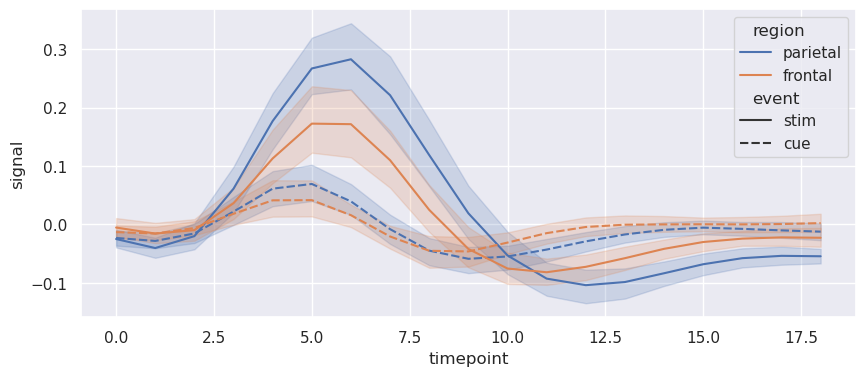

In [2]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [8]:
titulo_short = 'GO'
titulo =  ''

In [9]:
FileIn =  './data/sstLD_anom_'+titulo_short+'.nc'
FileOut = './images/map_sstd_anom_'+titulo_short+'.png'
Title  = 'Anomalia de temperatura superficial en el '+ titulo

In [10]:
data = xr.open_dataset(FileIn)
sst = data.sst

FileNotFoundError: [Errno 2] No such file or directory: '/home/pvb/Analisis/SSTGlobalAnalysis/data/sstLD_anom_GO.nc'

In [6]:
sst

NameError: name 'sst' is not defined

NameError: name 'sst' is not defined

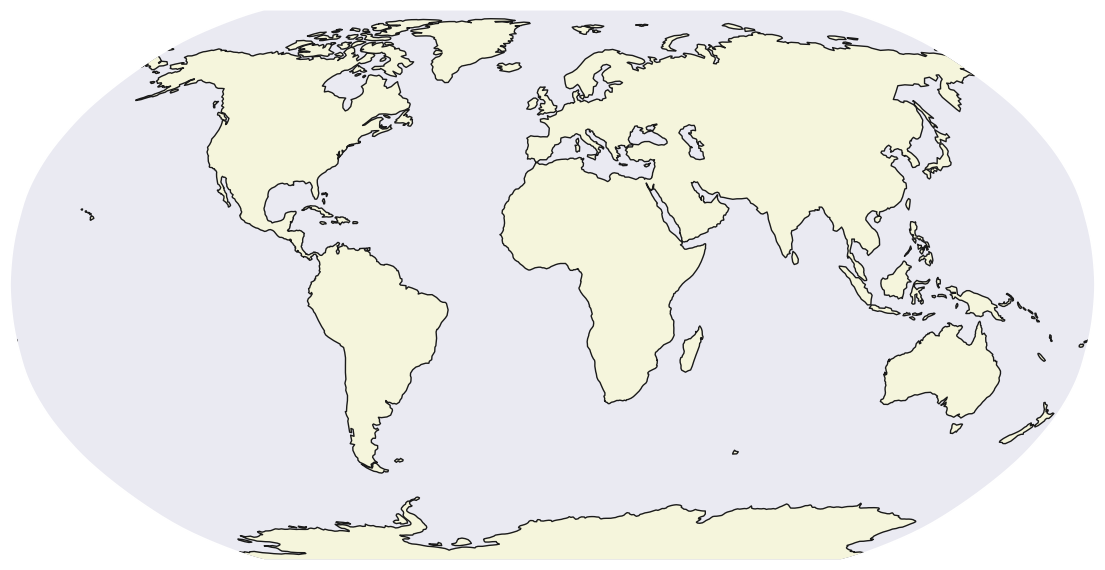

In [7]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = '110m' ,
                facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
ax.add_feature(cfeature.LAND)
    
cm=ax.contourf(sst.lon,sst.lat,sst, levels=np.arange(-3,3.1,0.25), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -3,vmax = 3,extend='both')

#ax.contour(sst.lon,sst.lat,sst, levels=[2,3], colors='k',
#               transform=ccrs.PlateCarree())

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=[-3,-2,0,2,3], 
                  drawedges=True)

ax.gridlines(draw_labels=True, linewidth=.5, 
             color='gray', alpha=0.5, linestyle='--')

ax.set_title(Title + '\n' +
             sst.time.dt.strftime("%d %B %Y").values);

plt.savefig(FileOut)